Confusion Matrix:
 [[63  0]
 [ 0 27]]

Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        63
      Faulty       1.00      1.00      1.00        27

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



/var/folders/tr/51y6qz611j73483c4shsv921b0m7rt/T/ipykernel_13852/1128064184.py:54: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.scatter(X[y == 0, 0], X[y == 0, 1], X[y == 0, 2], c='blue', label='Normal', edgecolor='k', s=50)
/var/folders/tr/51y6qz611j73483c4shsv921b0m7rt/T/ipykernel_13852/1128064184.py:55: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.scatter(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], c='red', label='Faulty', edgecolor='k', s=50)
/var/folders/tr/51y6qz611j73483c4shsv921b0m7rt/T/ipykernel_13852/1128064184.py:68: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper in

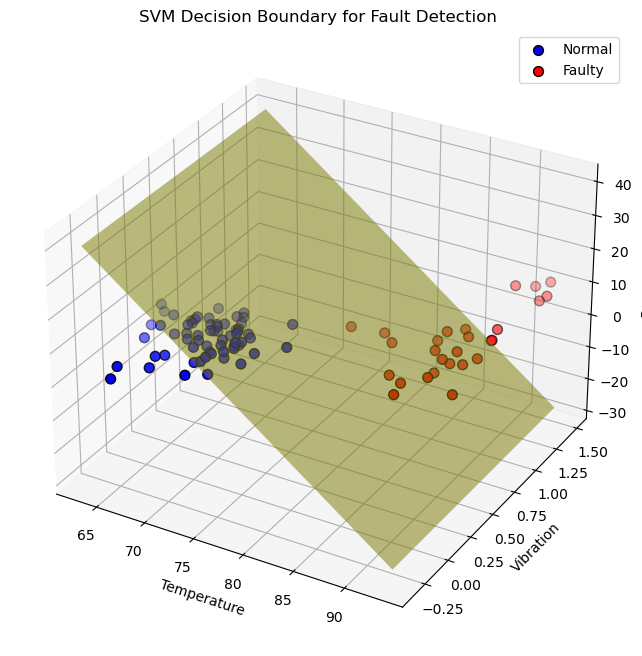

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Generate Sample Data
np.random.seed(42)

# Generate 'normal' data (sensor readings for normal machine state)
normal_data = np.random.multivariate_normal(
    mean=[70, 0.2, 5],     # mean values for temperature, vibration, and pressure
    cov=[[10, 0.1, 0.5],   # covariance matrix (to simulate correlated sensor readings)
         [0.1, 0.05, 0.2],
         [0.5, 0.2, 2]],
    size=200               # number of normal data points
)

# Generate 'faulty' data (sensor readings for faulty machine state)
faulty_data = np.random.multivariate_normal(
    mean=[90, 0.8, 8],     # mean values for temperature, vibration, and pressure (higher values indicate faults)
    cov=[[15, 0.2, 1.0],   # covariance matrix
         [0.2, 0.1, 0.3],
         [1.0, 0.3, 3]],
    size=100               # number of faulty data points
)

# Combine normal and faulty data
X = np.vstack((normal_data, faulty_data))
y = np.array([0] * 200 + [1] * 100)  # Labels: 0 = Normal, 1 = Faulty

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the SVM Model
model = SVC(kernel='linear', C=1.0)  # Using a linear kernel to visualize a plane
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Normal', 'Faulty']))

# Step 6: 3D Visualization
def plot_3d_decision_boundary(X, y, model):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for normal and faulty points
    ax.scatter(X[y == 0, 0], X[y == 0, 1], X[y == 0, 2], c='blue', label='Normal', edgecolor='k', s=50)
    ax.scatter(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], c='red', label='Faulty', edgecolor='k', s=50)

    # Creating a grid to plot the decision boundary
    xlim = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
    ylim = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
    X1, X2 = np.meshgrid(xlim, ylim)
    
    # Use the model's coefficients to calculate the Z values
    coef = model.coef_[0]
    intercept = model.intercept_[0]
    Z = -(coef[0] * X1 + coef[1] * X2 + intercept) / coef[2]

    # Plot the decision boundary
    ax.plot_surface(X1, X2, Z, color='yellow', alpha=0.5, rstride=100, cstride=100)

    # Set labels and title
    ax.set_xlabel('Temperature')
    ax.set_ylabel('Vibration')
    ax.set_zlabel('Pressure')
    ax.set_title('SVM Decision Boundary for Fault Detection')

    # Adding legend
    ax.legend()
    plt.show()

# Visualize the decision boundary in 3D
plot_3d_decision_boundary(X_test, y_test, model)


In [3]:
!pip install dash plotly

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go


In [5]:
# Step 1: Generate Sample Data
np.random.seed(42)

# Generate 'normal' data (sensor readings for normal machine state)
normal_data = np.random.multivariate_normal(
    mean=[70, 0.2, 5],     # mean values for temperature, vibration, and pressure
    cov=[[10, 0.1, 0.5],   # covariance matrix (to simulate correlated sensor readings)
         [0.1, 0.05, 0.2],
         [0.5, 0.2, 2]],
    size=200               # number of normal data points
)

# Generate 'faulty' data (sensor readings for faulty machine state)
faulty_data = np.random.multivariate_normal(
    mean=[90, 0.8, 8],     # mean values for temperature, vibration, and pressure (higher values indicate faults)
    cov=[[15, 0.2, 1.0],   # covariance matrix
         [0.2, 0.1, 0.3],
         [1.0, 0.3, 3]],
    size=100               # number of faulty data points
)

# Combine normal and faulty data
X = np.vstack((normal_data, faulty_data))
y = np.array([0] * 200 + [1] * 100)  # Labels: 0 = Normal, 1 = Faulty


In [6]:
# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the SVM Model
model = SVC(kernel='linear', C=1.0)  # Using a linear kernel to visualize a plane
model.fit(X_train, y_train)


SVC(kernel='linear')

In [8]:
# Step 4: Dash App and Plotly Visualization
app = dash.Dash(__name__)

def create_3d_plot(X, y, model):
    # Create a mesh grid
    xlim = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
    ylim = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
    X1, X2 = np.meshgrid(xlim, ylim)
    
    # Calculate the Z values (pressure values) using the model's coefficients
    coef = model.coef_[0]
    intercept = model.intercept_[0]
    Z = -(coef[0] * X1 + coef[1] * X2 + intercept) / coef[2]

    # Plot the data points
    trace1 = go.Scatter3d(
        x=X[y == 0, 0], y=X[y == 0, 1], z=X[y == 0, 2],
        mode='markers',
        marker=dict(color='blue', size=5, line=dict(width=1)),
        name='Normal'
    )

    trace2 = go.Scatter3d(
        x=X[y == 1, 0], y=X[y == 1, 1], z=X[y == 1, 2],
        mode='markers',
        marker=dict(color='red', size=5, line=dict(width=1)),
        name='Faulty'
    )

    # Plot the decision boundary
    trace3 = go.Surface(
        x=X1, y=X2, z=Z,
        colorscale='YlOrRd',
        opacity=0.5,
        showscale=False
    )

    layout = go.Layout(
        title='SVM Decision Boundary for Fault Detection',
        scene=dict(
            xaxis=dict(title='Temperature'),
            yaxis=dict(title='Vibration'),
            zaxis=dict(title='Pressure')
        ),
        margin=dict(l=0, r=0, b=0, t=40),
        showlegend=True
    )

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    return fig


In [7]:
!pip install jupyter-dash

  Using cached jupyter_dash-0.4.2-py3-none-any.whl (23 kB)


In [9]:
from jupyter_dash import JupyterDash

# Initialize the JupyterDash app
app = JupyterDash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Fault Detection Using SVM (3D Interactive Plot)"),
    dcc.Graph(id='3d-plot', figure=create_3d_plot(X_test, y_test, model))
])

# Run the app in Jupyter Notebook
app.run_server(mode='inline')


/opt/homebrew/anaconda3/lib/python3.11/site-packages/dash/dash.py:556: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.

